In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('best_complaints.csv')

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/25/19,"Credit reporting, credit repair services, or o...",Credit reporting,Unable to get your credit report or credit score,Problem getting your free annual credit report,I am resubmitting my complaint trying to get m...,None,"EQUIFAX, INC.",FL,None,None,Consent provided,Web,03/26/19,Closed with non-monetary relief,Yes,NaN,3190752
1,04/04/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I have noticed that XXXX XXXX XXXX have placed...,None,"EQUIFAX, INC.",MO,630XX,None,Consent provided,Web,04/04/19,Closed with explanation,Yes,NaN,3201056
2,03/30/19,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,They refuse to investigate dispute because the...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,782XX,None,Consent provided,Web,04/04/19,Closed with explanation,Yes,NaN,3196475
3,07/30/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,The following companies ran unauthorized credi...,None,"EQUIFAX, INC.",FL,322XX,None,Consent provided,Web,07/30/19,Closed with explanation,Yes,NaN,3324019
4,03/31/19,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,"On XX/XX/XXXX, I applied for a Citi XXXX Visa ...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",CO,80215,None,Consent provided,Web,03/31/19,Closed with explanation,Yes,NaN,3197078


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df=df[df['Consumer complaint narrative'].notna()]

In [6]:
df.shape

(548660, 18)

In [7]:
df=df.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'})

In [8]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

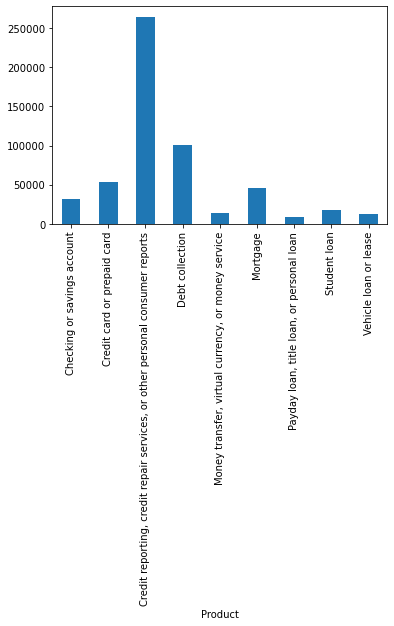

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure()
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)

In [10]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    264501
Debt collection                                                                 100405
Credit card or prepaid card                                                      53392
Mortgage                                                                         45157
Checking or savings account                                                      31508
Student loan                                                                     17007
Money transfer, virtual currency, or money service                               14313
Vehicle loan or lease                                                            13061
Payday loan, title loan, or personal loan                                         9316
Name: Product, dtype: int64

In [11]:
credit_report=df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']
prepaid_card=df[df['Product']=='Credit card or prepaid card']
debt_collection=df[df['Product']=='Debt collection']
vehicle_loan=df[df['Product']=='Vehicle loan or lease']
mortgage=df[df['Product']=='Mortgage']
payday_loan=df[df['Product']=='Payday loan, title loan, or personal loan']
money_transfer=df[df['Product']=='Money transfer, virtual currency, or money service']
student_loan=df[df['Product']=='Student loan']
savings_account=df[df['Product']=='Checking or savings account']

In [12]:
from textaugment import EDA
t = EDA()
for i in range(0,6):
    ans = t.synonym_replacement("someone in north Carolina has stolen my identity information and has purchased items including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police report was filed as soon as I found out about it on XXXX/XXXX/2015. A investigation from XXXX is under way thru there fraud department and our local police department.",6)

    print("This is ans:",ans)
    print("--------------------")

/home/ubuntu/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


This is ans: someone in north carolinas has stolen my identity operator information and has purchased items including XXXX cell earpiece thru XXXX on XXXX/XXXX/2015. A constabulary report was filed as soon as I found out about it on XXXX/XXXX/2015. A investigation from XXXX is under way thru there faker department and our topical anaesthetic constabulary department.
--------------------
This is ans: someone in north Carolina has slip my identity information and has purchased items including XXXX cell phones thru XXXX on XXXX/XXXX/2015. A police paper was lodge as soon as I found out about it on XXXX/XXXX/2015. A probe from XXXX is under right smart thru there fraud department and our topical anesthetic police department.
--------------------
This is ans: someone in northward Carolina has stolen my identity data and has purchase items including XXXX cell speech sound thru XXXX on XXXX/XXXX/2015. A police report was file away as soon as iodine found out about it on XXXX/XXXX/2015. A inve

In [13]:
credit_report=credit_report.sample(20000)
prepaid_card=prepaid_card.sample(20000)
debt_collection=debt_collection.sample(20000)
vehicle_loan=vehicle_loan.sample(13000)
mortgage=mortgage.sample(20000)
payday_loan=payday_loan.sample(9000)
money_transfer=money_transfer.sample(14000)
student_loan=student_loan.sample(17000)
savings_account=savings_account.sample(20000)

In [14]:
print(credit_report)

       Date received                                            Product  \
318938      12/12/20  Credit reporting, credit repair services, or o...   
367230      01/06/21  Credit reporting, credit repair services, or o...   
96563       04/26/17  Credit reporting, credit repair services, or o...   
292906      10/19/20  Credit reporting, credit repair services, or o...   
476892      09/19/18  Credit reporting, credit repair services, or o...   
...              ...                                                ...   
49861       10/30/19  Credit reporting, credit repair services, or o...   
223511      02/04/20  Credit reporting, credit repair services, or o...   
101437      05/27/19  Credit reporting, credit repair services, or o...   
145333      02/04/19  Credit reporting, credit repair services, or o...   
404730      04/08/21  Credit reporting, credit repair services, or o...   

             Sub-product                                              Issue  \
318938  Credit repor

In [15]:
credit_report = credit_report[['Consumer_complaint_narrative','Product']]
prepaid_card = prepaid_card[['Consumer_complaint_narrative','Product']]
debt_collection = debt_collection[['Consumer_complaint_narrative','Product']]
vehicle_loan = vehicle_loan[['Consumer_complaint_narrative','Product']]
mortgage = mortgage[['Consumer_complaint_narrative','Product']]
payday_loan = payday_loan[['Consumer_complaint_narrative','Product']]
money_transfer = money_transfer[['Consumer_complaint_narrative','Product']]
student_loan = student_loan[['Consumer_complaint_narrative','Product']]
savings_account = savings_account[['Consumer_complaint_narrative','Product']]

df=credit_report.append(prepaid_card,ignore_index=True)
df=df.append(debt_collection,ignore_index=True)
df=df.append(vehicle_loan,ignore_index=True)
df=df.append(mortgage,ignore_index=True)
df=df.append(payday_loan,ignore_index=True)
df=df.append(money_transfer,ignore_index=True)
df=df.append(student_loan,ignore_index=True)
df=df.append(savings_account,ignore_index=True)
print(df.shape)
        


(153000, 2)


In [16]:
print(vehicle_loan.shape)

d={"Consumer_complaint_narrative":[],"Product":[]}


from textaugment import EDA
t = EDA()

ud = pd.DataFrame(d)
for index,row in vehicle_loan.head(7000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

vehicle_loan = ud
#print(vehicle_loan.shape)

ud = pd.DataFrame(d)
for index,row in payday_loan.head(5500).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,2):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

payday_loan = ud

ud = pd.DataFrame(d)
for index,row in money_transfer.head(6000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

money_transfer = ud

ud = pd.DataFrame(d)
for index,row in student_loan.head(3000).iterrows():
    sen = row.Consumer_complaint_narrative
    lab = row.Product
    for num_sen in range(0,1):
        ans = t.synonym_replacement(sen,6)
        #print(len(vehicle_loan.index))
        ud.loc[len(ud.index)] = [ans,lab]
        print(ud.shape)

student_loan = ud





(13000, 2)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(5, 2)
(6, 2)
(7, 2)
(8, 2)
(9, 2)
(10, 2)
(11, 2)
(12, 2)
(13, 2)
(14, 2)
(15, 2)
(16, 2)
(17, 2)
(18, 2)
(19, 2)
(20, 2)
(21, 2)
(22, 2)
(23, 2)
(24, 2)
(25, 2)
(26, 2)
(27, 2)
(28, 2)
(29, 2)
(30, 2)
(31, 2)
(32, 2)
(33, 2)
(34, 2)
(35, 2)
(36, 2)
(37, 2)
(38, 2)
(39, 2)
(40, 2)
(41, 2)
(42, 2)
(43, 2)
(44, 2)
(45, 2)
(46, 2)
(47, 2)
(48, 2)
(49, 2)
(50, 2)
(51, 2)
(52, 2)
(53, 2)
(54, 2)
(55, 2)
(56, 2)
(57, 2)
(58, 2)
(59, 2)
(60, 2)
(61, 2)
(62, 2)
(63, 2)
(64, 2)
(65, 2)
(66, 2)
(67, 2)
(68, 2)
(69, 2)
(70, 2)
(71, 2)
(72, 2)
(73, 2)
(74, 2)
(75, 2)
(76, 2)
(77, 2)
(78, 2)
(79, 2)
(80, 2)
(81, 2)
(82, 2)
(83, 2)
(84, 2)
(85, 2)
(86, 2)
(87, 2)
(88, 2)
(89, 2)
(90, 2)
(91, 2)
(92, 2)
(93, 2)
(94, 2)
(95, 2)
(96, 2)
(97, 2)
(98, 2)
(99, 2)
(100, 2)
(101, 2)
(102, 2)
(103, 2)
(104, 2)
(105, 2)
(106, 2)
(107, 2)
(108, 2)
(109, 2)
(110, 2)
(111, 2)
(112, 2)
(113, 2)
(114, 2)
(115, 2)
(116, 2)
(117, 2)
(118, 2)
(119, 2)
(120, 2)
(121, 2)
(122, 2)

(937, 2)
(938, 2)
(939, 2)
(940, 2)
(941, 2)
(942, 2)
(943, 2)
(944, 2)
(945, 2)
(946, 2)
(947, 2)
(948, 2)
(949, 2)
(950, 2)
(951, 2)
(952, 2)
(953, 2)
(954, 2)
(955, 2)
(956, 2)
(957, 2)
(958, 2)
(959, 2)
(960, 2)
(961, 2)
(962, 2)
(963, 2)
(964, 2)
(965, 2)
(966, 2)
(967, 2)
(968, 2)
(969, 2)
(970, 2)
(971, 2)
(972, 2)
(973, 2)
(974, 2)
(975, 2)
(976, 2)
(977, 2)
(978, 2)
(979, 2)
(980, 2)
(981, 2)
(982, 2)
(983, 2)
(984, 2)
(985, 2)
(986, 2)
(987, 2)
(988, 2)
(989, 2)
(990, 2)
(991, 2)
(992, 2)
(993, 2)
(994, 2)
(995, 2)
(996, 2)
(997, 2)
(998, 2)
(999, 2)
(1000, 2)
(1001, 2)
(1002, 2)
(1003, 2)
(1004, 2)
(1005, 2)
(1006, 2)
(1007, 2)
(1008, 2)
(1009, 2)
(1010, 2)
(1011, 2)
(1012, 2)
(1013, 2)
(1014, 2)
(1015, 2)
(1016, 2)
(1017, 2)
(1018, 2)
(1019, 2)
(1020, 2)
(1021, 2)
(1022, 2)
(1023, 2)
(1024, 2)
(1025, 2)
(1026, 2)
(1027, 2)
(1028, 2)
(1029, 2)
(1030, 2)
(1031, 2)
(1032, 2)
(1033, 2)
(1034, 2)
(1035, 2)
(1036, 2)
(1037, 2)
(1038, 2)
(1039, 2)
(1040, 2)
(1041, 2)
(1042, 2)
(10

(1765, 2)
(1766, 2)
(1767, 2)
(1768, 2)
(1769, 2)
(1770, 2)
(1771, 2)
(1772, 2)
(1773, 2)
(1774, 2)
(1775, 2)
(1776, 2)
(1777, 2)
(1778, 2)
(1779, 2)
(1780, 2)
(1781, 2)
(1782, 2)
(1783, 2)
(1784, 2)
(1785, 2)
(1786, 2)
(1787, 2)
(1788, 2)
(1789, 2)
(1790, 2)
(1791, 2)
(1792, 2)
(1793, 2)
(1794, 2)
(1795, 2)
(1796, 2)
(1797, 2)
(1798, 2)
(1799, 2)
(1800, 2)
(1801, 2)
(1802, 2)
(1803, 2)
(1804, 2)
(1805, 2)
(1806, 2)
(1807, 2)
(1808, 2)
(1809, 2)
(1810, 2)
(1811, 2)
(1812, 2)
(1813, 2)
(1814, 2)
(1815, 2)
(1816, 2)
(1817, 2)
(1818, 2)
(1819, 2)
(1820, 2)
(1821, 2)
(1822, 2)
(1823, 2)
(1824, 2)
(1825, 2)
(1826, 2)
(1827, 2)
(1828, 2)
(1829, 2)
(1830, 2)
(1831, 2)
(1832, 2)
(1833, 2)
(1834, 2)
(1835, 2)
(1836, 2)
(1837, 2)
(1838, 2)
(1839, 2)
(1840, 2)
(1841, 2)
(1842, 2)
(1843, 2)
(1844, 2)
(1845, 2)
(1846, 2)
(1847, 2)
(1848, 2)
(1849, 2)
(1850, 2)
(1851, 2)
(1852, 2)
(1853, 2)
(1854, 2)
(1855, 2)
(1856, 2)
(1857, 2)
(1858, 2)
(1859, 2)
(1860, 2)
(1861, 2)
(1862, 2)
(1863, 2)
(1864, 2)


(2586, 2)
(2587, 2)
(2588, 2)
(2589, 2)
(2590, 2)
(2591, 2)
(2592, 2)
(2593, 2)
(2594, 2)
(2595, 2)
(2596, 2)
(2597, 2)
(2598, 2)
(2599, 2)
(2600, 2)
(2601, 2)
(2602, 2)
(2603, 2)
(2604, 2)
(2605, 2)
(2606, 2)
(2607, 2)
(2608, 2)
(2609, 2)
(2610, 2)
(2611, 2)
(2612, 2)
(2613, 2)
(2614, 2)
(2615, 2)
(2616, 2)
(2617, 2)
(2618, 2)
(2619, 2)
(2620, 2)
(2621, 2)
(2622, 2)
(2623, 2)
(2624, 2)
(2625, 2)
(2626, 2)
(2627, 2)
(2628, 2)
(2629, 2)
(2630, 2)
(2631, 2)
(2632, 2)
(2633, 2)
(2634, 2)
(2635, 2)
(2636, 2)
(2637, 2)
(2638, 2)
(2639, 2)
(2640, 2)
(2641, 2)
(2642, 2)
(2643, 2)
(2644, 2)
(2645, 2)
(2646, 2)
(2647, 2)
(2648, 2)
(2649, 2)
(2650, 2)
(2651, 2)
(2652, 2)
(2653, 2)
(2654, 2)
(2655, 2)
(2656, 2)
(2657, 2)
(2658, 2)
(2659, 2)
(2660, 2)
(2661, 2)
(2662, 2)
(2663, 2)
(2664, 2)
(2665, 2)
(2666, 2)
(2667, 2)
(2668, 2)
(2669, 2)
(2670, 2)
(2671, 2)
(2672, 2)
(2673, 2)
(2674, 2)
(2675, 2)
(2676, 2)
(2677, 2)
(2678, 2)
(2679, 2)
(2680, 2)
(2681, 2)
(2682, 2)
(2683, 2)
(2684, 2)
(2685, 2)


(3427, 2)
(3428, 2)
(3429, 2)
(3430, 2)
(3431, 2)
(3432, 2)
(3433, 2)
(3434, 2)
(3435, 2)
(3436, 2)
(3437, 2)
(3438, 2)
(3439, 2)
(3440, 2)
(3441, 2)
(3442, 2)
(3443, 2)
(3444, 2)
(3445, 2)
(3446, 2)
(3447, 2)
(3448, 2)
(3449, 2)
(3450, 2)
(3451, 2)
(3452, 2)
(3453, 2)
(3454, 2)
(3455, 2)
(3456, 2)
(3457, 2)
(3458, 2)
(3459, 2)
(3460, 2)
(3461, 2)
(3462, 2)
(3463, 2)
(3464, 2)
(3465, 2)
(3466, 2)
(3467, 2)
(3468, 2)
(3469, 2)
(3470, 2)
(3471, 2)
(3472, 2)
(3473, 2)
(3474, 2)
(3475, 2)
(3476, 2)
(3477, 2)
(3478, 2)
(3479, 2)
(3480, 2)
(3481, 2)
(3482, 2)
(3483, 2)
(3484, 2)
(3485, 2)
(3486, 2)
(3487, 2)
(3488, 2)
(3489, 2)
(3490, 2)
(3491, 2)
(3492, 2)
(3493, 2)
(3494, 2)
(3495, 2)
(3496, 2)
(3497, 2)
(3498, 2)
(3499, 2)
(3500, 2)
(3501, 2)
(3502, 2)
(3503, 2)
(3504, 2)
(3505, 2)
(3506, 2)
(3507, 2)
(3508, 2)
(3509, 2)
(3510, 2)
(3511, 2)
(3512, 2)
(3513, 2)
(3514, 2)
(3515, 2)
(3516, 2)
(3517, 2)
(3518, 2)
(3519, 2)
(3520, 2)
(3521, 2)
(3522, 2)
(3523, 2)
(3524, 2)
(3525, 2)
(3526, 2)


(4252, 2)
(4253, 2)
(4254, 2)
(4255, 2)
(4256, 2)
(4257, 2)
(4258, 2)
(4259, 2)
(4260, 2)
(4261, 2)
(4262, 2)
(4263, 2)
(4264, 2)
(4265, 2)
(4266, 2)
(4267, 2)
(4268, 2)
(4269, 2)
(4270, 2)
(4271, 2)
(4272, 2)
(4273, 2)
(4274, 2)
(4275, 2)
(4276, 2)
(4277, 2)
(4278, 2)
(4279, 2)
(4280, 2)
(4281, 2)
(4282, 2)
(4283, 2)
(4284, 2)
(4285, 2)
(4286, 2)
(4287, 2)
(4288, 2)
(4289, 2)
(4290, 2)
(4291, 2)
(4292, 2)
(4293, 2)
(4294, 2)
(4295, 2)
(4296, 2)
(4297, 2)
(4298, 2)
(4299, 2)
(4300, 2)
(4301, 2)
(4302, 2)
(4303, 2)
(4304, 2)
(4305, 2)
(4306, 2)
(4307, 2)
(4308, 2)
(4309, 2)
(4310, 2)
(4311, 2)
(4312, 2)
(4313, 2)
(4314, 2)
(4315, 2)
(4316, 2)
(4317, 2)
(4318, 2)
(4319, 2)
(4320, 2)
(4321, 2)
(4322, 2)
(4323, 2)
(4324, 2)
(4325, 2)
(4326, 2)
(4327, 2)
(4328, 2)
(4329, 2)
(4330, 2)
(4331, 2)
(4332, 2)
(4333, 2)
(4334, 2)
(4335, 2)
(4336, 2)
(4337, 2)
(4338, 2)
(4339, 2)
(4340, 2)
(4341, 2)
(4342, 2)
(4343, 2)
(4344, 2)
(4345, 2)
(4346, 2)
(4347, 2)
(4348, 2)
(4349, 2)
(4350, 2)
(4351, 2)


(5075, 2)
(5076, 2)
(5077, 2)
(5078, 2)
(5079, 2)
(5080, 2)
(5081, 2)
(5082, 2)
(5083, 2)
(5084, 2)
(5085, 2)
(5086, 2)
(5087, 2)
(5088, 2)
(5089, 2)
(5090, 2)
(5091, 2)
(5092, 2)
(5093, 2)
(5094, 2)
(5095, 2)
(5096, 2)
(5097, 2)
(5098, 2)
(5099, 2)
(5100, 2)
(5101, 2)
(5102, 2)
(5103, 2)
(5104, 2)
(5105, 2)
(5106, 2)
(5107, 2)
(5108, 2)
(5109, 2)
(5110, 2)
(5111, 2)
(5112, 2)
(5113, 2)
(5114, 2)
(5115, 2)
(5116, 2)
(5117, 2)
(5118, 2)
(5119, 2)
(5120, 2)
(5121, 2)
(5122, 2)
(5123, 2)
(5124, 2)
(5125, 2)
(5126, 2)
(5127, 2)
(5128, 2)
(5129, 2)
(5130, 2)
(5131, 2)
(5132, 2)
(5133, 2)
(5134, 2)
(5135, 2)
(5136, 2)
(5137, 2)
(5138, 2)
(5139, 2)
(5140, 2)
(5141, 2)
(5142, 2)
(5143, 2)
(5144, 2)
(5145, 2)
(5146, 2)
(5147, 2)
(5148, 2)
(5149, 2)
(5150, 2)
(5151, 2)
(5152, 2)
(5153, 2)
(5154, 2)
(5155, 2)
(5156, 2)
(5157, 2)
(5158, 2)
(5159, 2)
(5160, 2)
(5161, 2)
(5162, 2)
(5163, 2)
(5164, 2)
(5165, 2)
(5166, 2)
(5167, 2)
(5168, 2)
(5169, 2)
(5170, 2)
(5171, 2)
(5172, 2)
(5173, 2)
(5174, 2)


(5895, 2)
(5896, 2)
(5897, 2)
(5898, 2)
(5899, 2)
(5900, 2)
(5901, 2)
(5902, 2)
(5903, 2)
(5904, 2)
(5905, 2)
(5906, 2)
(5907, 2)
(5908, 2)
(5909, 2)
(5910, 2)
(5911, 2)
(5912, 2)
(5913, 2)
(5914, 2)
(5915, 2)
(5916, 2)
(5917, 2)
(5918, 2)
(5919, 2)
(5920, 2)
(5921, 2)
(5922, 2)
(5923, 2)
(5924, 2)
(5925, 2)
(5926, 2)
(5927, 2)
(5928, 2)
(5929, 2)
(5930, 2)
(5931, 2)
(5932, 2)
(5933, 2)
(5934, 2)
(5935, 2)
(5936, 2)
(5937, 2)
(5938, 2)
(5939, 2)
(5940, 2)
(5941, 2)
(5942, 2)
(5943, 2)
(5944, 2)
(5945, 2)
(5946, 2)
(5947, 2)
(5948, 2)
(5949, 2)
(5950, 2)
(5951, 2)
(5952, 2)
(5953, 2)
(5954, 2)
(5955, 2)
(5956, 2)
(5957, 2)
(5958, 2)
(5959, 2)
(5960, 2)
(5961, 2)
(5962, 2)
(5963, 2)
(5964, 2)
(5965, 2)
(5966, 2)
(5967, 2)
(5968, 2)
(5969, 2)
(5970, 2)
(5971, 2)
(5972, 2)
(5973, 2)
(5974, 2)
(5975, 2)
(5976, 2)
(5977, 2)
(5978, 2)
(5979, 2)
(5980, 2)
(5981, 2)
(5982, 2)
(5983, 2)
(5984, 2)
(5985, 2)
(5986, 2)
(5987, 2)
(5988, 2)
(5989, 2)
(5990, 2)
(5991, 2)
(5992, 2)
(5993, 2)
(5994, 2)


(6717, 2)
(6718, 2)
(6719, 2)
(6720, 2)
(6721, 2)
(6722, 2)
(6723, 2)
(6724, 2)
(6725, 2)
(6726, 2)
(6727, 2)
(6728, 2)
(6729, 2)
(6730, 2)
(6731, 2)
(6732, 2)
(6733, 2)
(6734, 2)
(6735, 2)
(6736, 2)
(6737, 2)
(6738, 2)
(6739, 2)
(6740, 2)
(6741, 2)
(6742, 2)
(6743, 2)
(6744, 2)
(6745, 2)
(6746, 2)
(6747, 2)
(6748, 2)
(6749, 2)
(6750, 2)
(6751, 2)
(6752, 2)
(6753, 2)
(6754, 2)
(6755, 2)
(6756, 2)
(6757, 2)
(6758, 2)
(6759, 2)
(6760, 2)
(6761, 2)
(6762, 2)
(6763, 2)
(6764, 2)
(6765, 2)
(6766, 2)
(6767, 2)
(6768, 2)
(6769, 2)
(6770, 2)
(6771, 2)
(6772, 2)
(6773, 2)
(6774, 2)
(6775, 2)
(6776, 2)
(6777, 2)
(6778, 2)
(6779, 2)
(6780, 2)
(6781, 2)
(6782, 2)
(6783, 2)
(6784, 2)
(6785, 2)
(6786, 2)
(6787, 2)
(6788, 2)
(6789, 2)
(6790, 2)
(6791, 2)
(6792, 2)
(6793, 2)
(6794, 2)
(6795, 2)
(6796, 2)
(6797, 2)
(6798, 2)
(6799, 2)
(6800, 2)
(6801, 2)
(6802, 2)
(6803, 2)
(6804, 2)
(6805, 2)
(6806, 2)
(6807, 2)
(6808, 2)
(6809, 2)
(6810, 2)
(6811, 2)
(6812, 2)
(6813, 2)
(6814, 2)
(6815, 2)
(6816, 2)


(615, 2)
(616, 2)
(617, 2)
(618, 2)
(619, 2)
(620, 2)
(621, 2)
(622, 2)
(623, 2)
(624, 2)
(625, 2)
(626, 2)
(627, 2)
(628, 2)
(629, 2)
(630, 2)
(631, 2)
(632, 2)
(633, 2)
(634, 2)
(635, 2)
(636, 2)
(637, 2)
(638, 2)
(639, 2)
(640, 2)
(641, 2)
(642, 2)
(643, 2)
(644, 2)
(645, 2)
(646, 2)
(647, 2)
(648, 2)
(649, 2)
(650, 2)
(651, 2)
(652, 2)
(653, 2)
(654, 2)
(655, 2)
(656, 2)
(657, 2)
(658, 2)
(659, 2)
(660, 2)
(661, 2)
(662, 2)
(663, 2)
(664, 2)
(665, 2)
(666, 2)
(667, 2)
(668, 2)
(669, 2)
(670, 2)
(671, 2)
(672, 2)
(673, 2)
(674, 2)
(675, 2)
(676, 2)
(677, 2)
(678, 2)
(679, 2)
(680, 2)
(681, 2)
(682, 2)
(683, 2)
(684, 2)
(685, 2)
(686, 2)
(687, 2)
(688, 2)
(689, 2)
(690, 2)
(691, 2)
(692, 2)
(693, 2)
(694, 2)
(695, 2)
(696, 2)
(697, 2)
(698, 2)
(699, 2)
(700, 2)
(701, 2)
(702, 2)
(703, 2)
(704, 2)
(705, 2)
(706, 2)
(707, 2)
(708, 2)
(709, 2)
(710, 2)
(711, 2)
(712, 2)
(713, 2)
(714, 2)
(715, 2)
(716, 2)
(717, 2)
(718, 2)
(719, 2)
(720, 2)
(721, 2)
(722, 2)
(723, 2)
(724, 2)
(725, 2)
(

(1478, 2)
(1479, 2)
(1480, 2)
(1481, 2)
(1482, 2)
(1483, 2)
(1484, 2)
(1485, 2)
(1486, 2)
(1487, 2)
(1488, 2)
(1489, 2)
(1490, 2)
(1491, 2)
(1492, 2)
(1493, 2)
(1494, 2)
(1495, 2)
(1496, 2)
(1497, 2)
(1498, 2)
(1499, 2)
(1500, 2)
(1501, 2)
(1502, 2)
(1503, 2)
(1504, 2)
(1505, 2)
(1506, 2)
(1507, 2)
(1508, 2)
(1509, 2)
(1510, 2)
(1511, 2)
(1512, 2)
(1513, 2)
(1514, 2)
(1515, 2)
(1516, 2)
(1517, 2)
(1518, 2)
(1519, 2)
(1520, 2)
(1521, 2)
(1522, 2)
(1523, 2)
(1524, 2)
(1525, 2)
(1526, 2)
(1527, 2)
(1528, 2)
(1529, 2)
(1530, 2)
(1531, 2)
(1532, 2)
(1533, 2)
(1534, 2)
(1535, 2)
(1536, 2)
(1537, 2)
(1538, 2)
(1539, 2)
(1540, 2)
(1541, 2)
(1542, 2)
(1543, 2)
(1544, 2)
(1545, 2)
(1546, 2)
(1547, 2)
(1548, 2)
(1549, 2)
(1550, 2)
(1551, 2)
(1552, 2)
(1553, 2)
(1554, 2)
(1555, 2)
(1556, 2)
(1557, 2)
(1558, 2)
(1559, 2)
(1560, 2)
(1561, 2)
(1562, 2)
(1563, 2)
(1564, 2)
(1565, 2)
(1566, 2)
(1567, 2)
(1568, 2)
(1569, 2)
(1570, 2)
(1571, 2)
(1572, 2)
(1573, 2)
(1574, 2)
(1575, 2)
(1576, 2)
(1577, 2)


(2307, 2)
(2308, 2)
(2309, 2)
(2310, 2)
(2311, 2)
(2312, 2)
(2313, 2)
(2314, 2)
(2315, 2)
(2316, 2)
(2317, 2)
(2318, 2)
(2319, 2)
(2320, 2)
(2321, 2)
(2322, 2)
(2323, 2)
(2324, 2)
(2325, 2)
(2326, 2)
(2327, 2)
(2328, 2)
(2329, 2)
(2330, 2)
(2331, 2)
(2332, 2)
(2333, 2)
(2334, 2)
(2335, 2)
(2336, 2)
(2337, 2)
(2338, 2)
(2339, 2)
(2340, 2)
(2341, 2)
(2342, 2)
(2343, 2)
(2344, 2)
(2345, 2)
(2346, 2)
(2347, 2)
(2348, 2)
(2349, 2)
(2350, 2)
(2351, 2)
(2352, 2)
(2353, 2)
(2354, 2)
(2355, 2)
(2356, 2)
(2357, 2)
(2358, 2)
(2359, 2)
(2360, 2)
(2361, 2)
(2362, 2)
(2363, 2)
(2364, 2)
(2365, 2)
(2366, 2)
(2367, 2)
(2368, 2)
(2369, 2)
(2370, 2)
(2371, 2)
(2372, 2)
(2373, 2)
(2374, 2)
(2375, 2)
(2376, 2)
(2377, 2)
(2378, 2)
(2379, 2)
(2380, 2)
(2381, 2)
(2382, 2)
(2383, 2)
(2384, 2)
(2385, 2)
(2386, 2)
(2387, 2)
(2388, 2)
(2389, 2)
(2390, 2)
(2391, 2)
(2392, 2)
(2393, 2)
(2394, 2)
(2395, 2)
(2396, 2)
(2397, 2)
(2398, 2)
(2399, 2)
(2400, 2)
(2401, 2)
(2402, 2)
(2403, 2)
(2404, 2)
(2405, 2)
(2406, 2)


(3134, 2)
(3135, 2)
(3136, 2)
(3137, 2)
(3138, 2)
(3139, 2)
(3140, 2)
(3141, 2)
(3142, 2)
(3143, 2)
(3144, 2)
(3145, 2)
(3146, 2)
(3147, 2)
(3148, 2)
(3149, 2)
(3150, 2)
(3151, 2)
(3152, 2)
(3153, 2)
(3154, 2)
(3155, 2)
(3156, 2)
(3157, 2)
(3158, 2)
(3159, 2)
(3160, 2)
(3161, 2)
(3162, 2)
(3163, 2)
(3164, 2)
(3165, 2)
(3166, 2)
(3167, 2)
(3168, 2)
(3169, 2)
(3170, 2)
(3171, 2)
(3172, 2)
(3173, 2)
(3174, 2)
(3175, 2)
(3176, 2)
(3177, 2)
(3178, 2)
(3179, 2)
(3180, 2)
(3181, 2)
(3182, 2)
(3183, 2)
(3184, 2)
(3185, 2)
(3186, 2)
(3187, 2)
(3188, 2)
(3189, 2)
(3190, 2)
(3191, 2)
(3192, 2)
(3193, 2)
(3194, 2)
(3195, 2)
(3196, 2)
(3197, 2)
(3198, 2)
(3199, 2)
(3200, 2)
(3201, 2)
(3202, 2)
(3203, 2)
(3204, 2)
(3205, 2)
(3206, 2)
(3207, 2)
(3208, 2)
(3209, 2)
(3210, 2)
(3211, 2)
(3212, 2)
(3213, 2)
(3214, 2)
(3215, 2)
(3216, 2)
(3217, 2)
(3218, 2)
(3219, 2)
(3220, 2)
(3221, 2)
(3222, 2)
(3223, 2)
(3224, 2)
(3225, 2)
(3226, 2)
(3227, 2)
(3228, 2)
(3229, 2)
(3230, 2)
(3231, 2)
(3232, 2)
(3233, 2)


(3958, 2)
(3959, 2)
(3960, 2)
(3961, 2)
(3962, 2)
(3963, 2)
(3964, 2)
(3965, 2)
(3966, 2)
(3967, 2)
(3968, 2)
(3969, 2)
(3970, 2)
(3971, 2)
(3972, 2)
(3973, 2)
(3974, 2)
(3975, 2)
(3976, 2)
(3977, 2)
(3978, 2)
(3979, 2)
(3980, 2)
(3981, 2)
(3982, 2)
(3983, 2)
(3984, 2)
(3985, 2)
(3986, 2)
(3987, 2)
(3988, 2)
(3989, 2)
(3990, 2)
(3991, 2)
(3992, 2)
(3993, 2)
(3994, 2)
(3995, 2)
(3996, 2)
(3997, 2)
(3998, 2)
(3999, 2)
(4000, 2)
(4001, 2)
(4002, 2)
(4003, 2)
(4004, 2)
(4005, 2)
(4006, 2)
(4007, 2)
(4008, 2)
(4009, 2)
(4010, 2)
(4011, 2)
(4012, 2)
(4013, 2)
(4014, 2)
(4015, 2)
(4016, 2)
(4017, 2)
(4018, 2)
(4019, 2)
(4020, 2)
(4021, 2)
(4022, 2)
(4023, 2)
(4024, 2)
(4025, 2)
(4026, 2)
(4027, 2)
(4028, 2)
(4029, 2)
(4030, 2)
(4031, 2)
(4032, 2)
(4033, 2)
(4034, 2)
(4035, 2)
(4036, 2)
(4037, 2)
(4038, 2)
(4039, 2)
(4040, 2)
(4041, 2)
(4042, 2)
(4043, 2)
(4044, 2)
(4045, 2)
(4046, 2)
(4047, 2)
(4048, 2)
(4049, 2)
(4050, 2)
(4051, 2)
(4052, 2)
(4053, 2)
(4054, 2)
(4055, 2)
(4056, 2)
(4057, 2)


(4790, 2)
(4791, 2)
(4792, 2)
(4793, 2)
(4794, 2)
(4795, 2)
(4796, 2)
(4797, 2)
(4798, 2)
(4799, 2)
(4800, 2)
(4801, 2)
(4802, 2)
(4803, 2)
(4804, 2)
(4805, 2)
(4806, 2)
(4807, 2)
(4808, 2)
(4809, 2)
(4810, 2)
(4811, 2)
(4812, 2)
(4813, 2)
(4814, 2)
(4815, 2)
(4816, 2)
(4817, 2)
(4818, 2)
(4819, 2)
(4820, 2)
(4821, 2)
(4822, 2)
(4823, 2)
(4824, 2)
(4825, 2)
(4826, 2)
(4827, 2)
(4828, 2)
(4829, 2)
(4830, 2)
(4831, 2)
(4832, 2)
(4833, 2)
(4834, 2)
(4835, 2)
(4836, 2)
(4837, 2)
(4838, 2)
(4839, 2)
(4840, 2)
(4841, 2)
(4842, 2)
(4843, 2)
(4844, 2)
(4845, 2)
(4846, 2)
(4847, 2)
(4848, 2)
(4849, 2)
(4850, 2)
(4851, 2)
(4852, 2)
(4853, 2)
(4854, 2)
(4855, 2)
(4856, 2)
(4857, 2)
(4858, 2)
(4859, 2)
(4860, 2)
(4861, 2)
(4862, 2)
(4863, 2)
(4864, 2)
(4865, 2)
(4866, 2)
(4867, 2)
(4868, 2)
(4869, 2)
(4870, 2)
(4871, 2)
(4872, 2)
(4873, 2)
(4874, 2)
(4875, 2)
(4876, 2)
(4877, 2)
(4878, 2)
(4879, 2)
(4880, 2)
(4881, 2)
(4882, 2)
(4883, 2)
(4884, 2)
(4885, 2)
(4886, 2)
(4887, 2)
(4888, 2)
(4889, 2)


(5627, 2)
(5628, 2)
(5629, 2)
(5630, 2)
(5631, 2)
(5632, 2)
(5633, 2)
(5634, 2)
(5635, 2)
(5636, 2)
(5637, 2)
(5638, 2)
(5639, 2)
(5640, 2)
(5641, 2)
(5642, 2)
(5643, 2)
(5644, 2)
(5645, 2)
(5646, 2)
(5647, 2)
(5648, 2)
(5649, 2)
(5650, 2)
(5651, 2)
(5652, 2)
(5653, 2)
(5654, 2)
(5655, 2)
(5656, 2)
(5657, 2)
(5658, 2)
(5659, 2)
(5660, 2)
(5661, 2)
(5662, 2)
(5663, 2)
(5664, 2)
(5665, 2)
(5666, 2)
(5667, 2)
(5668, 2)
(5669, 2)
(5670, 2)
(5671, 2)
(5672, 2)
(5673, 2)
(5674, 2)
(5675, 2)
(5676, 2)
(5677, 2)
(5678, 2)
(5679, 2)
(5680, 2)
(5681, 2)
(5682, 2)
(5683, 2)
(5684, 2)
(5685, 2)
(5686, 2)
(5687, 2)
(5688, 2)
(5689, 2)
(5690, 2)
(5691, 2)
(5692, 2)
(5693, 2)
(5694, 2)
(5695, 2)
(5696, 2)
(5697, 2)
(5698, 2)
(5699, 2)
(5700, 2)
(5701, 2)
(5702, 2)
(5703, 2)
(5704, 2)
(5705, 2)
(5706, 2)
(5707, 2)
(5708, 2)
(5709, 2)
(5710, 2)
(5711, 2)
(5712, 2)
(5713, 2)
(5714, 2)
(5715, 2)
(5716, 2)
(5717, 2)
(5718, 2)
(5719, 2)
(5720, 2)
(5721, 2)
(5722, 2)
(5723, 2)
(5724, 2)
(5725, 2)
(5726, 2)


(6458, 2)
(6459, 2)
(6460, 2)
(6461, 2)
(6462, 2)
(6463, 2)
(6464, 2)
(6465, 2)
(6466, 2)
(6467, 2)
(6468, 2)
(6469, 2)
(6470, 2)
(6471, 2)
(6472, 2)
(6473, 2)
(6474, 2)
(6475, 2)
(6476, 2)
(6477, 2)
(6478, 2)
(6479, 2)
(6480, 2)
(6481, 2)
(6482, 2)
(6483, 2)
(6484, 2)
(6485, 2)
(6486, 2)
(6487, 2)
(6488, 2)
(6489, 2)
(6490, 2)
(6491, 2)
(6492, 2)
(6493, 2)
(6494, 2)
(6495, 2)
(6496, 2)
(6497, 2)
(6498, 2)
(6499, 2)
(6500, 2)
(6501, 2)
(6502, 2)
(6503, 2)
(6504, 2)
(6505, 2)
(6506, 2)
(6507, 2)
(6508, 2)
(6509, 2)
(6510, 2)
(6511, 2)
(6512, 2)
(6513, 2)
(6514, 2)
(6515, 2)
(6516, 2)
(6517, 2)
(6518, 2)
(6519, 2)
(6520, 2)
(6521, 2)
(6522, 2)
(6523, 2)
(6524, 2)
(6525, 2)
(6526, 2)
(6527, 2)
(6528, 2)
(6529, 2)
(6530, 2)
(6531, 2)
(6532, 2)
(6533, 2)
(6534, 2)
(6535, 2)
(6536, 2)
(6537, 2)
(6538, 2)
(6539, 2)
(6540, 2)
(6541, 2)
(6542, 2)
(6543, 2)
(6544, 2)
(6545, 2)
(6546, 2)
(6547, 2)
(6548, 2)
(6549, 2)
(6550, 2)
(6551, 2)
(6552, 2)
(6553, 2)
(6554, 2)
(6555, 2)
(6556, 2)
(6557, 2)


(7294, 2)
(7295, 2)
(7296, 2)
(7297, 2)
(7298, 2)
(7299, 2)
(7300, 2)
(7301, 2)
(7302, 2)
(7303, 2)
(7304, 2)
(7305, 2)
(7306, 2)
(7307, 2)
(7308, 2)
(7309, 2)
(7310, 2)
(7311, 2)
(7312, 2)
(7313, 2)
(7314, 2)
(7315, 2)
(7316, 2)
(7317, 2)
(7318, 2)
(7319, 2)
(7320, 2)
(7321, 2)
(7322, 2)
(7323, 2)
(7324, 2)
(7325, 2)
(7326, 2)
(7327, 2)
(7328, 2)
(7329, 2)
(7330, 2)
(7331, 2)
(7332, 2)
(7333, 2)
(7334, 2)
(7335, 2)
(7336, 2)
(7337, 2)
(7338, 2)
(7339, 2)
(7340, 2)
(7341, 2)
(7342, 2)
(7343, 2)
(7344, 2)
(7345, 2)
(7346, 2)
(7347, 2)
(7348, 2)
(7349, 2)
(7350, 2)
(7351, 2)
(7352, 2)
(7353, 2)
(7354, 2)
(7355, 2)
(7356, 2)
(7357, 2)
(7358, 2)
(7359, 2)
(7360, 2)
(7361, 2)
(7362, 2)
(7363, 2)
(7364, 2)
(7365, 2)
(7366, 2)
(7367, 2)
(7368, 2)
(7369, 2)
(7370, 2)
(7371, 2)
(7372, 2)
(7373, 2)
(7374, 2)
(7375, 2)
(7376, 2)
(7377, 2)
(7378, 2)
(7379, 2)
(7380, 2)
(7381, 2)
(7382, 2)
(7383, 2)
(7384, 2)
(7385, 2)
(7386, 2)
(7387, 2)
(7388, 2)
(7389, 2)
(7390, 2)
(7391, 2)
(7392, 2)
(7393, 2)


(8127, 2)
(8128, 2)
(8129, 2)
(8130, 2)
(8131, 2)
(8132, 2)
(8133, 2)
(8134, 2)
(8135, 2)
(8136, 2)
(8137, 2)
(8138, 2)
(8139, 2)
(8140, 2)
(8141, 2)
(8142, 2)
(8143, 2)
(8144, 2)
(8145, 2)
(8146, 2)
(8147, 2)
(8148, 2)
(8149, 2)
(8150, 2)
(8151, 2)
(8152, 2)
(8153, 2)
(8154, 2)
(8155, 2)
(8156, 2)
(8157, 2)
(8158, 2)
(8159, 2)
(8160, 2)
(8161, 2)
(8162, 2)
(8163, 2)
(8164, 2)
(8165, 2)
(8166, 2)
(8167, 2)
(8168, 2)
(8169, 2)
(8170, 2)
(8171, 2)
(8172, 2)
(8173, 2)
(8174, 2)
(8175, 2)
(8176, 2)
(8177, 2)
(8178, 2)
(8179, 2)
(8180, 2)
(8181, 2)
(8182, 2)
(8183, 2)
(8184, 2)
(8185, 2)
(8186, 2)
(8187, 2)
(8188, 2)
(8189, 2)
(8190, 2)
(8191, 2)
(8192, 2)
(8193, 2)
(8194, 2)
(8195, 2)
(8196, 2)
(8197, 2)
(8198, 2)
(8199, 2)
(8200, 2)
(8201, 2)
(8202, 2)
(8203, 2)
(8204, 2)
(8205, 2)
(8206, 2)
(8207, 2)
(8208, 2)
(8209, 2)
(8210, 2)
(8211, 2)
(8212, 2)
(8213, 2)
(8214, 2)
(8215, 2)
(8216, 2)
(8217, 2)
(8218, 2)
(8219, 2)
(8220, 2)
(8221, 2)
(8222, 2)
(8223, 2)
(8224, 2)
(8225, 2)
(8226, 2)


(8960, 2)
(8961, 2)
(8962, 2)
(8963, 2)
(8964, 2)
(8965, 2)
(8966, 2)
(8967, 2)
(8968, 2)
(8969, 2)
(8970, 2)
(8971, 2)
(8972, 2)
(8973, 2)
(8974, 2)
(8975, 2)
(8976, 2)
(8977, 2)
(8978, 2)
(8979, 2)
(8980, 2)
(8981, 2)
(8982, 2)
(8983, 2)
(8984, 2)
(8985, 2)
(8986, 2)
(8987, 2)
(8988, 2)
(8989, 2)
(8990, 2)
(8991, 2)
(8992, 2)
(8993, 2)
(8994, 2)
(8995, 2)
(8996, 2)
(8997, 2)
(8998, 2)
(8999, 2)
(9000, 2)
(9001, 2)
(9002, 2)
(9003, 2)
(9004, 2)
(9005, 2)
(9006, 2)
(9007, 2)
(9008, 2)
(9009, 2)
(9010, 2)
(9011, 2)
(9012, 2)
(9013, 2)
(9014, 2)
(9015, 2)
(9016, 2)
(9017, 2)
(9018, 2)
(9019, 2)
(9020, 2)
(9021, 2)
(9022, 2)
(9023, 2)
(9024, 2)
(9025, 2)
(9026, 2)
(9027, 2)
(9028, 2)
(9029, 2)
(9030, 2)
(9031, 2)
(9032, 2)
(9033, 2)
(9034, 2)
(9035, 2)
(9036, 2)
(9037, 2)
(9038, 2)
(9039, 2)
(9040, 2)
(9041, 2)
(9042, 2)
(9043, 2)
(9044, 2)
(9045, 2)
(9046, 2)
(9047, 2)
(9048, 2)
(9049, 2)
(9050, 2)
(9051, 2)
(9052, 2)
(9053, 2)
(9054, 2)
(9055, 2)
(9056, 2)
(9057, 2)
(9058, 2)
(9059, 2)


(9788, 2)
(9789, 2)
(9790, 2)
(9791, 2)
(9792, 2)
(9793, 2)
(9794, 2)
(9795, 2)
(9796, 2)
(9797, 2)
(9798, 2)
(9799, 2)
(9800, 2)
(9801, 2)
(9802, 2)
(9803, 2)
(9804, 2)
(9805, 2)
(9806, 2)
(9807, 2)
(9808, 2)
(9809, 2)
(9810, 2)
(9811, 2)
(9812, 2)
(9813, 2)
(9814, 2)
(9815, 2)
(9816, 2)
(9817, 2)
(9818, 2)
(9819, 2)
(9820, 2)
(9821, 2)
(9822, 2)
(9823, 2)
(9824, 2)
(9825, 2)
(9826, 2)
(9827, 2)
(9828, 2)
(9829, 2)
(9830, 2)
(9831, 2)
(9832, 2)
(9833, 2)
(9834, 2)
(9835, 2)
(9836, 2)
(9837, 2)
(9838, 2)
(9839, 2)
(9840, 2)
(9841, 2)
(9842, 2)
(9843, 2)
(9844, 2)
(9845, 2)
(9846, 2)
(9847, 2)
(9848, 2)
(9849, 2)
(9850, 2)
(9851, 2)
(9852, 2)
(9853, 2)
(9854, 2)
(9855, 2)
(9856, 2)
(9857, 2)
(9858, 2)
(9859, 2)
(9860, 2)
(9861, 2)
(9862, 2)
(9863, 2)
(9864, 2)
(9865, 2)
(9866, 2)
(9867, 2)
(9868, 2)
(9869, 2)
(9870, 2)
(9871, 2)
(9872, 2)
(9873, 2)
(9874, 2)
(9875, 2)
(9876, 2)
(9877, 2)
(9878, 2)
(9879, 2)
(9880, 2)
(9881, 2)
(9882, 2)
(9883, 2)
(9884, 2)
(9885, 2)
(9886, 2)
(9887, 2)


(10556, 2)
(10557, 2)
(10558, 2)
(10559, 2)
(10560, 2)
(10561, 2)
(10562, 2)
(10563, 2)
(10564, 2)
(10565, 2)
(10566, 2)
(10567, 2)
(10568, 2)
(10569, 2)
(10570, 2)
(10571, 2)
(10572, 2)
(10573, 2)
(10574, 2)
(10575, 2)
(10576, 2)
(10577, 2)
(10578, 2)
(10579, 2)
(10580, 2)
(10581, 2)
(10582, 2)
(10583, 2)
(10584, 2)
(10585, 2)
(10586, 2)
(10587, 2)
(10588, 2)
(10589, 2)
(10590, 2)
(10591, 2)
(10592, 2)
(10593, 2)
(10594, 2)
(10595, 2)
(10596, 2)
(10597, 2)
(10598, 2)
(10599, 2)
(10600, 2)
(10601, 2)
(10602, 2)
(10603, 2)
(10604, 2)
(10605, 2)
(10606, 2)
(10607, 2)
(10608, 2)
(10609, 2)
(10610, 2)
(10611, 2)
(10612, 2)
(10613, 2)
(10614, 2)
(10615, 2)
(10616, 2)
(10617, 2)
(10618, 2)
(10619, 2)
(10620, 2)
(10621, 2)
(10622, 2)
(10623, 2)
(10624, 2)
(10625, 2)
(10626, 2)
(10627, 2)
(10628, 2)
(10629, 2)
(10630, 2)
(10631, 2)
(10632, 2)
(10633, 2)
(10634, 2)
(10635, 2)
(10636, 2)
(10637, 2)
(10638, 2)
(10639, 2)
(10640, 2)
(10641, 2)
(10642, 2)
(10643, 2)
(10644, 2)
(10645, 2)
(10646, 2)

(397, 2)
(398, 2)
(399, 2)
(400, 2)
(401, 2)
(402, 2)
(403, 2)
(404, 2)
(405, 2)
(406, 2)
(407, 2)
(408, 2)
(409, 2)
(410, 2)
(411, 2)
(412, 2)
(413, 2)
(414, 2)
(415, 2)
(416, 2)
(417, 2)
(418, 2)
(419, 2)
(420, 2)
(421, 2)
(422, 2)
(423, 2)
(424, 2)
(425, 2)
(426, 2)
(427, 2)
(428, 2)
(429, 2)
(430, 2)
(431, 2)
(432, 2)
(433, 2)
(434, 2)
(435, 2)
(436, 2)
(437, 2)
(438, 2)
(439, 2)
(440, 2)
(441, 2)
(442, 2)
(443, 2)
(444, 2)
(445, 2)
(446, 2)
(447, 2)
(448, 2)
(449, 2)
(450, 2)
(451, 2)
(452, 2)
(453, 2)
(454, 2)
(455, 2)
(456, 2)
(457, 2)
(458, 2)
(459, 2)
(460, 2)
(461, 2)
(462, 2)
(463, 2)
(464, 2)
(465, 2)
(466, 2)
(467, 2)
(468, 2)
(469, 2)
(470, 2)
(471, 2)
(472, 2)
(473, 2)
(474, 2)
(475, 2)
(476, 2)
(477, 2)
(478, 2)
(479, 2)
(480, 2)
(481, 2)
(482, 2)
(483, 2)
(484, 2)
(485, 2)
(486, 2)
(487, 2)
(488, 2)
(489, 2)
(490, 2)
(491, 2)
(492, 2)
(493, 2)
(494, 2)
(495, 2)
(496, 2)
(497, 2)
(498, 2)
(499, 2)
(500, 2)
(501, 2)
(502, 2)
(503, 2)
(504, 2)
(505, 2)
(506, 2)
(507, 2)
(

(1285, 2)
(1286, 2)
(1287, 2)
(1288, 2)
(1289, 2)
(1290, 2)
(1291, 2)
(1292, 2)
(1293, 2)
(1294, 2)
(1295, 2)
(1296, 2)
(1297, 2)
(1298, 2)
(1299, 2)
(1300, 2)
(1301, 2)
(1302, 2)
(1303, 2)
(1304, 2)
(1305, 2)
(1306, 2)
(1307, 2)
(1308, 2)
(1309, 2)
(1310, 2)
(1311, 2)
(1312, 2)
(1313, 2)
(1314, 2)
(1315, 2)
(1316, 2)
(1317, 2)
(1318, 2)
(1319, 2)
(1320, 2)
(1321, 2)
(1322, 2)
(1323, 2)
(1324, 2)
(1325, 2)
(1326, 2)
(1327, 2)
(1328, 2)
(1329, 2)
(1330, 2)
(1331, 2)
(1332, 2)
(1333, 2)
(1334, 2)
(1335, 2)
(1336, 2)
(1337, 2)
(1338, 2)
(1339, 2)
(1340, 2)
(1341, 2)
(1342, 2)
(1343, 2)
(1344, 2)
(1345, 2)
(1346, 2)
(1347, 2)
(1348, 2)
(1349, 2)
(1350, 2)
(1351, 2)
(1352, 2)
(1353, 2)
(1354, 2)
(1355, 2)
(1356, 2)
(1357, 2)
(1358, 2)
(1359, 2)
(1360, 2)
(1361, 2)
(1362, 2)
(1363, 2)
(1364, 2)
(1365, 2)
(1366, 2)
(1367, 2)
(1368, 2)
(1369, 2)
(1370, 2)
(1371, 2)
(1372, 2)
(1373, 2)
(1374, 2)
(1375, 2)
(1376, 2)
(1377, 2)
(1378, 2)
(1379, 2)
(1380, 2)
(1381, 2)
(1382, 2)
(1383, 2)
(1384, 2)


(2120, 2)
(2121, 2)
(2122, 2)
(2123, 2)
(2124, 2)
(2125, 2)
(2126, 2)
(2127, 2)
(2128, 2)
(2129, 2)
(2130, 2)
(2131, 2)
(2132, 2)
(2133, 2)
(2134, 2)
(2135, 2)
(2136, 2)
(2137, 2)
(2138, 2)
(2139, 2)
(2140, 2)
(2141, 2)
(2142, 2)
(2143, 2)
(2144, 2)
(2145, 2)
(2146, 2)
(2147, 2)
(2148, 2)
(2149, 2)
(2150, 2)
(2151, 2)
(2152, 2)
(2153, 2)
(2154, 2)
(2155, 2)
(2156, 2)
(2157, 2)
(2158, 2)
(2159, 2)
(2160, 2)
(2161, 2)
(2162, 2)
(2163, 2)
(2164, 2)
(2165, 2)
(2166, 2)
(2167, 2)
(2168, 2)
(2169, 2)
(2170, 2)
(2171, 2)
(2172, 2)
(2173, 2)
(2174, 2)
(2175, 2)
(2176, 2)
(2177, 2)
(2178, 2)
(2179, 2)
(2180, 2)
(2181, 2)
(2182, 2)
(2183, 2)
(2184, 2)
(2185, 2)
(2186, 2)
(2187, 2)
(2188, 2)
(2189, 2)
(2190, 2)
(2191, 2)
(2192, 2)
(2193, 2)
(2194, 2)
(2195, 2)
(2196, 2)
(2197, 2)
(2198, 2)
(2199, 2)
(2200, 2)
(2201, 2)
(2202, 2)
(2203, 2)
(2204, 2)
(2205, 2)
(2206, 2)
(2207, 2)
(2208, 2)
(2209, 2)
(2210, 2)
(2211, 2)
(2212, 2)
(2213, 2)
(2214, 2)
(2215, 2)
(2216, 2)
(2217, 2)
(2218, 2)
(2219, 2)


(2956, 2)
(2957, 2)
(2958, 2)
(2959, 2)
(2960, 2)
(2961, 2)
(2962, 2)
(2963, 2)
(2964, 2)
(2965, 2)
(2966, 2)
(2967, 2)
(2968, 2)
(2969, 2)
(2970, 2)
(2971, 2)
(2972, 2)
(2973, 2)
(2974, 2)
(2975, 2)
(2976, 2)
(2977, 2)
(2978, 2)
(2979, 2)
(2980, 2)
(2981, 2)
(2982, 2)
(2983, 2)
(2984, 2)
(2985, 2)
(2986, 2)
(2987, 2)
(2988, 2)
(2989, 2)
(2990, 2)
(2991, 2)
(2992, 2)
(2993, 2)
(2994, 2)
(2995, 2)
(2996, 2)
(2997, 2)
(2998, 2)
(2999, 2)
(3000, 2)
(3001, 2)
(3002, 2)
(3003, 2)
(3004, 2)
(3005, 2)
(3006, 2)
(3007, 2)
(3008, 2)
(3009, 2)
(3010, 2)
(3011, 2)
(3012, 2)
(3013, 2)
(3014, 2)
(3015, 2)
(3016, 2)
(3017, 2)
(3018, 2)
(3019, 2)
(3020, 2)
(3021, 2)
(3022, 2)
(3023, 2)
(3024, 2)
(3025, 2)
(3026, 2)
(3027, 2)
(3028, 2)
(3029, 2)
(3030, 2)
(3031, 2)
(3032, 2)
(3033, 2)
(3034, 2)
(3035, 2)
(3036, 2)
(3037, 2)
(3038, 2)
(3039, 2)
(3040, 2)
(3041, 2)
(3042, 2)
(3043, 2)
(3044, 2)
(3045, 2)
(3046, 2)
(3047, 2)
(3048, 2)
(3049, 2)
(3050, 2)
(3051, 2)
(3052, 2)
(3053, 2)
(3054, 2)
(3055, 2)


(3791, 2)
(3792, 2)
(3793, 2)
(3794, 2)
(3795, 2)
(3796, 2)
(3797, 2)
(3798, 2)
(3799, 2)
(3800, 2)
(3801, 2)
(3802, 2)
(3803, 2)
(3804, 2)
(3805, 2)
(3806, 2)
(3807, 2)
(3808, 2)
(3809, 2)
(3810, 2)
(3811, 2)
(3812, 2)
(3813, 2)
(3814, 2)
(3815, 2)
(3816, 2)
(3817, 2)
(3818, 2)
(3819, 2)
(3820, 2)
(3821, 2)
(3822, 2)
(3823, 2)
(3824, 2)
(3825, 2)
(3826, 2)
(3827, 2)
(3828, 2)
(3829, 2)
(3830, 2)
(3831, 2)
(3832, 2)
(3833, 2)
(3834, 2)
(3835, 2)
(3836, 2)
(3837, 2)
(3838, 2)
(3839, 2)
(3840, 2)
(3841, 2)
(3842, 2)
(3843, 2)
(3844, 2)
(3845, 2)
(3846, 2)
(3847, 2)
(3848, 2)
(3849, 2)
(3850, 2)
(3851, 2)
(3852, 2)
(3853, 2)
(3854, 2)
(3855, 2)
(3856, 2)
(3857, 2)
(3858, 2)
(3859, 2)
(3860, 2)
(3861, 2)
(3862, 2)
(3863, 2)
(3864, 2)
(3865, 2)
(3866, 2)
(3867, 2)
(3868, 2)
(3869, 2)
(3870, 2)
(3871, 2)
(3872, 2)
(3873, 2)
(3874, 2)
(3875, 2)
(3876, 2)
(3877, 2)
(3878, 2)
(3879, 2)
(3880, 2)
(3881, 2)
(3882, 2)
(3883, 2)
(3884, 2)
(3885, 2)
(3886, 2)
(3887, 2)
(3888, 2)
(3889, 2)
(3890, 2)


(4615, 2)
(4616, 2)
(4617, 2)
(4618, 2)
(4619, 2)
(4620, 2)
(4621, 2)
(4622, 2)
(4623, 2)
(4624, 2)
(4625, 2)
(4626, 2)
(4627, 2)
(4628, 2)
(4629, 2)
(4630, 2)
(4631, 2)
(4632, 2)
(4633, 2)
(4634, 2)
(4635, 2)
(4636, 2)
(4637, 2)
(4638, 2)
(4639, 2)
(4640, 2)
(4641, 2)
(4642, 2)
(4643, 2)
(4644, 2)
(4645, 2)
(4646, 2)
(4647, 2)
(4648, 2)
(4649, 2)
(4650, 2)
(4651, 2)
(4652, 2)
(4653, 2)
(4654, 2)
(4655, 2)
(4656, 2)
(4657, 2)
(4658, 2)
(4659, 2)
(4660, 2)
(4661, 2)
(4662, 2)
(4663, 2)
(4664, 2)
(4665, 2)
(4666, 2)
(4667, 2)
(4668, 2)
(4669, 2)
(4670, 2)
(4671, 2)
(4672, 2)
(4673, 2)
(4674, 2)
(4675, 2)
(4676, 2)
(4677, 2)
(4678, 2)
(4679, 2)
(4680, 2)
(4681, 2)
(4682, 2)
(4683, 2)
(4684, 2)
(4685, 2)
(4686, 2)
(4687, 2)
(4688, 2)
(4689, 2)
(4690, 2)
(4691, 2)
(4692, 2)
(4693, 2)
(4694, 2)
(4695, 2)
(4696, 2)
(4697, 2)
(4698, 2)
(4699, 2)
(4700, 2)
(4701, 2)
(4702, 2)
(4703, 2)
(4704, 2)
(4705, 2)
(4706, 2)
(4707, 2)
(4708, 2)
(4709, 2)
(4710, 2)
(4711, 2)
(4712, 2)
(4713, 2)
(4714, 2)


(5446, 2)
(5447, 2)
(5448, 2)
(5449, 2)
(5450, 2)
(5451, 2)
(5452, 2)
(5453, 2)
(5454, 2)
(5455, 2)
(5456, 2)
(5457, 2)
(5458, 2)
(5459, 2)
(5460, 2)
(5461, 2)
(5462, 2)
(5463, 2)
(5464, 2)
(5465, 2)
(5466, 2)
(5467, 2)
(5468, 2)
(5469, 2)
(5470, 2)
(5471, 2)
(5472, 2)
(5473, 2)
(5474, 2)
(5475, 2)
(5476, 2)
(5477, 2)
(5478, 2)
(5479, 2)
(5480, 2)
(5481, 2)
(5482, 2)
(5483, 2)
(5484, 2)
(5485, 2)
(5486, 2)
(5487, 2)
(5488, 2)
(5489, 2)
(5490, 2)
(5491, 2)
(5492, 2)
(5493, 2)
(5494, 2)
(5495, 2)
(5496, 2)
(5497, 2)
(5498, 2)
(5499, 2)
(5500, 2)
(5501, 2)
(5502, 2)
(5503, 2)
(5504, 2)
(5505, 2)
(5506, 2)
(5507, 2)
(5508, 2)
(5509, 2)
(5510, 2)
(5511, 2)
(5512, 2)
(5513, 2)
(5514, 2)
(5515, 2)
(5516, 2)
(5517, 2)
(5518, 2)
(5519, 2)
(5520, 2)
(5521, 2)
(5522, 2)
(5523, 2)
(5524, 2)
(5525, 2)
(5526, 2)
(5527, 2)
(5528, 2)
(5529, 2)
(5530, 2)
(5531, 2)
(5532, 2)
(5533, 2)
(5534, 2)
(5535, 2)
(5536, 2)
(5537, 2)
(5538, 2)
(5539, 2)
(5540, 2)
(5541, 2)
(5542, 2)
(5543, 2)
(5544, 2)
(5545, 2)


(318, 2)
(319, 2)
(320, 2)
(321, 2)
(322, 2)
(323, 2)
(324, 2)
(325, 2)
(326, 2)
(327, 2)
(328, 2)
(329, 2)
(330, 2)
(331, 2)
(332, 2)
(333, 2)
(334, 2)
(335, 2)
(336, 2)
(337, 2)
(338, 2)
(339, 2)
(340, 2)
(341, 2)
(342, 2)
(343, 2)
(344, 2)
(345, 2)
(346, 2)
(347, 2)
(348, 2)
(349, 2)
(350, 2)
(351, 2)
(352, 2)
(353, 2)
(354, 2)
(355, 2)
(356, 2)
(357, 2)
(358, 2)
(359, 2)
(360, 2)
(361, 2)
(362, 2)
(363, 2)
(364, 2)
(365, 2)
(366, 2)
(367, 2)
(368, 2)
(369, 2)
(370, 2)
(371, 2)
(372, 2)
(373, 2)
(374, 2)
(375, 2)
(376, 2)
(377, 2)
(378, 2)
(379, 2)
(380, 2)
(381, 2)
(382, 2)
(383, 2)
(384, 2)
(385, 2)
(386, 2)
(387, 2)
(388, 2)
(389, 2)
(390, 2)
(391, 2)
(392, 2)
(393, 2)
(394, 2)
(395, 2)
(396, 2)
(397, 2)
(398, 2)
(399, 2)
(400, 2)
(401, 2)
(402, 2)
(403, 2)
(404, 2)
(405, 2)
(406, 2)
(407, 2)
(408, 2)
(409, 2)
(410, 2)
(411, 2)
(412, 2)
(413, 2)
(414, 2)
(415, 2)
(416, 2)
(417, 2)
(418, 2)
(419, 2)
(420, 2)
(421, 2)
(422, 2)
(423, 2)
(424, 2)
(425, 2)
(426, 2)
(427, 2)
(428, 2)
(

(1216, 2)
(1217, 2)
(1218, 2)
(1219, 2)
(1220, 2)
(1221, 2)
(1222, 2)
(1223, 2)
(1224, 2)
(1225, 2)
(1226, 2)
(1227, 2)
(1228, 2)
(1229, 2)
(1230, 2)
(1231, 2)
(1232, 2)
(1233, 2)
(1234, 2)
(1235, 2)
(1236, 2)
(1237, 2)
(1238, 2)
(1239, 2)
(1240, 2)
(1241, 2)
(1242, 2)
(1243, 2)
(1244, 2)
(1245, 2)
(1246, 2)
(1247, 2)
(1248, 2)
(1249, 2)
(1250, 2)
(1251, 2)
(1252, 2)
(1253, 2)
(1254, 2)
(1255, 2)
(1256, 2)
(1257, 2)
(1258, 2)
(1259, 2)
(1260, 2)
(1261, 2)
(1262, 2)
(1263, 2)
(1264, 2)
(1265, 2)
(1266, 2)
(1267, 2)
(1268, 2)
(1269, 2)
(1270, 2)
(1271, 2)
(1272, 2)
(1273, 2)
(1274, 2)
(1275, 2)
(1276, 2)
(1277, 2)
(1278, 2)
(1279, 2)
(1280, 2)
(1281, 2)
(1282, 2)
(1283, 2)
(1284, 2)
(1285, 2)
(1286, 2)
(1287, 2)
(1288, 2)
(1289, 2)
(1290, 2)
(1291, 2)
(1292, 2)
(1293, 2)
(1294, 2)
(1295, 2)
(1296, 2)
(1297, 2)
(1298, 2)
(1299, 2)
(1300, 2)
(1301, 2)
(1302, 2)
(1303, 2)
(1304, 2)
(1305, 2)
(1306, 2)
(1307, 2)
(1308, 2)
(1309, 2)
(1310, 2)
(1311, 2)
(1312, 2)
(1313, 2)
(1314, 2)
(1315, 2)


(2053, 2)
(2054, 2)
(2055, 2)
(2056, 2)
(2057, 2)
(2058, 2)
(2059, 2)
(2060, 2)
(2061, 2)
(2062, 2)
(2063, 2)
(2064, 2)
(2065, 2)
(2066, 2)
(2067, 2)
(2068, 2)
(2069, 2)
(2070, 2)
(2071, 2)
(2072, 2)
(2073, 2)
(2074, 2)
(2075, 2)
(2076, 2)
(2077, 2)
(2078, 2)
(2079, 2)
(2080, 2)
(2081, 2)
(2082, 2)
(2083, 2)
(2084, 2)
(2085, 2)
(2086, 2)
(2087, 2)
(2088, 2)
(2089, 2)
(2090, 2)
(2091, 2)
(2092, 2)
(2093, 2)
(2094, 2)
(2095, 2)
(2096, 2)
(2097, 2)
(2098, 2)
(2099, 2)
(2100, 2)
(2101, 2)
(2102, 2)
(2103, 2)
(2104, 2)
(2105, 2)
(2106, 2)
(2107, 2)
(2108, 2)
(2109, 2)
(2110, 2)
(2111, 2)
(2112, 2)
(2113, 2)
(2114, 2)
(2115, 2)
(2116, 2)
(2117, 2)
(2118, 2)
(2119, 2)
(2120, 2)
(2121, 2)
(2122, 2)
(2123, 2)
(2124, 2)
(2125, 2)
(2126, 2)
(2127, 2)
(2128, 2)
(2129, 2)
(2130, 2)
(2131, 2)
(2132, 2)
(2133, 2)
(2134, 2)
(2135, 2)
(2136, 2)
(2137, 2)
(2138, 2)
(2139, 2)
(2140, 2)
(2141, 2)
(2142, 2)
(2143, 2)
(2144, 2)
(2145, 2)
(2146, 2)
(2147, 2)
(2148, 2)
(2149, 2)
(2150, 2)
(2151, 2)
(2152, 2)


(2884, 2)
(2885, 2)
(2886, 2)
(2887, 2)
(2888, 2)
(2889, 2)
(2890, 2)
(2891, 2)
(2892, 2)
(2893, 2)
(2894, 2)
(2895, 2)
(2896, 2)
(2897, 2)
(2898, 2)
(2899, 2)
(2900, 2)
(2901, 2)
(2902, 2)
(2903, 2)
(2904, 2)
(2905, 2)
(2906, 2)
(2907, 2)
(2908, 2)
(2909, 2)
(2910, 2)
(2911, 2)
(2912, 2)
(2913, 2)
(2914, 2)
(2915, 2)
(2916, 2)
(2917, 2)
(2918, 2)
(2919, 2)
(2920, 2)
(2921, 2)
(2922, 2)
(2923, 2)
(2924, 2)
(2925, 2)
(2926, 2)
(2927, 2)
(2928, 2)
(2929, 2)
(2930, 2)
(2931, 2)
(2932, 2)
(2933, 2)
(2934, 2)
(2935, 2)
(2936, 2)
(2937, 2)
(2938, 2)
(2939, 2)
(2940, 2)
(2941, 2)
(2942, 2)
(2943, 2)
(2944, 2)
(2945, 2)
(2946, 2)
(2947, 2)
(2948, 2)
(2949, 2)
(2950, 2)
(2951, 2)
(2952, 2)
(2953, 2)
(2954, 2)
(2955, 2)
(2956, 2)
(2957, 2)
(2958, 2)
(2959, 2)
(2960, 2)
(2961, 2)
(2962, 2)
(2963, 2)
(2964, 2)
(2965, 2)
(2966, 2)
(2967, 2)
(2968, 2)
(2969, 2)
(2970, 2)
(2971, 2)
(2972, 2)
(2973, 2)
(2974, 2)
(2975, 2)
(2976, 2)
(2977, 2)
(2978, 2)
(2979, 2)
(2980, 2)
(2981, 2)
(2982, 2)
(2983, 2)


In [17]:
df=df.append(vehicle_loan,ignore_index=True)
df=df.append(payday_loan,ignore_index=True)
df=df.append(money_transfer,ignore_index=True)
df=df.append(student_loan,ignore_index=True)

In [18]:
df.shape

(180000, 2)

In [19]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    20000
Checking or savings account                                                     20000
Mortgage                                                                        20000
Credit card or prepaid card                                                     20000
Debt collection                                                                 20000
Payday loan, title loan, or personal loan                                       20000
Student loan                                                                    20000
Vehicle loan or lease                                                           20000
Money transfer, virtual currency, or money service                              20000
Name: Product, dtype: int64

In [20]:
#LowerCase Conversion
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [21]:
df['Consumer_complaint_narrative'].sample(5)

175203    on xx/xx/2018, i sent xxxx euros to my stepson...
38959     i see multiple 30-60 days late marks which is ...
41806     don't do as xxxx xxxx xxxx, rushing to file la...
4265      i have filed several complaints against this c...
43422     this company has reported this as a new debt o...
Name: Consumer_complaint_narrative, dtype: object

In [22]:
#Punctuations Removal
#Digits Removal
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace(r'[\d]',"")

In [23]:
#StopWords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
lemmatizer=WordNetLemmatizer()

In [26]:
#Lemmatization
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [27]:
#Removing xxxx present in complaints
df['Consumer_complaint_narrative'] =df['Consumer_complaint_narrative'].str.replace('x',"")

In [28]:
for index,row in df.iterrows():
    row['Consumer_complaint_narrative']=row['Consumer_complaint_narrative'].strip()

In [29]:
df.to_csv('cleaner.csv')

In [29]:
df['Consumer_complaint_narrative'].sample(5)

61806     car     damaged hurricane harvey car insurance...
129880    called bass associate   company claim student ...
54671     received notice debt psc regarding medical ser...
26640     received letter bank america dated   case numb...
172768    report locked long dozen day zip response coin...
Name: Consumer_complaint_narrative, dtype: object

Credit reporting, credit repair services, or other personal consumer reports


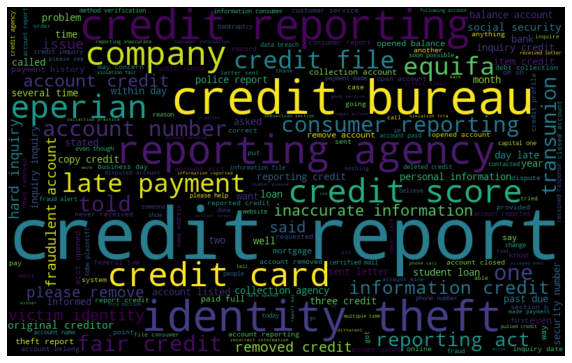

Credit card or prepaid card


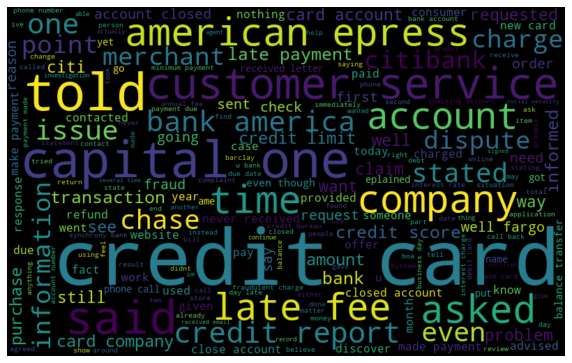

Debt collection


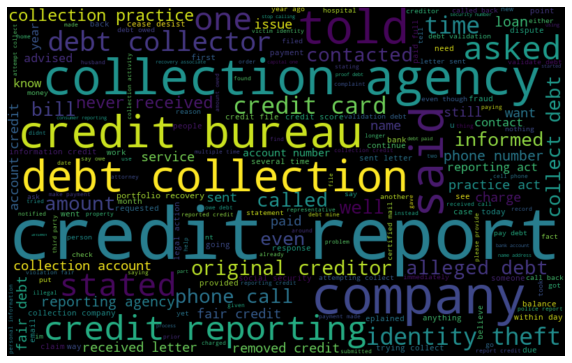

Vehicle loan or lease


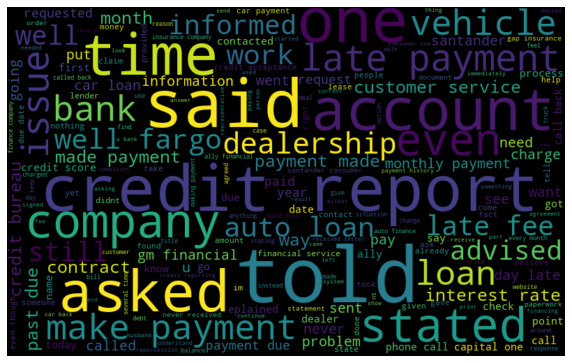

Mortgage


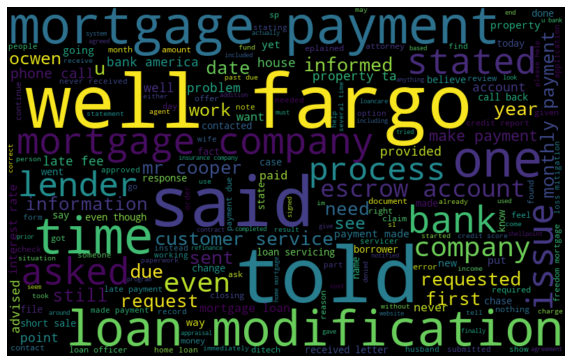

Payday loan, title loan, or personal loan


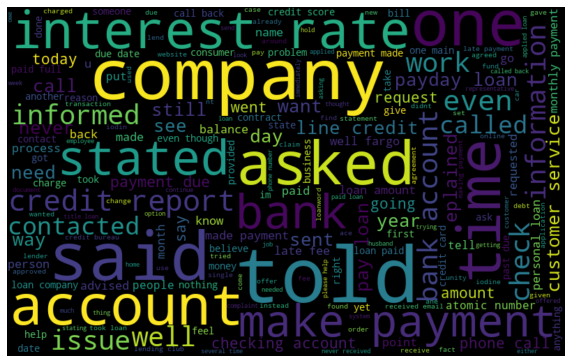

Money transfer, virtual currency, or money service


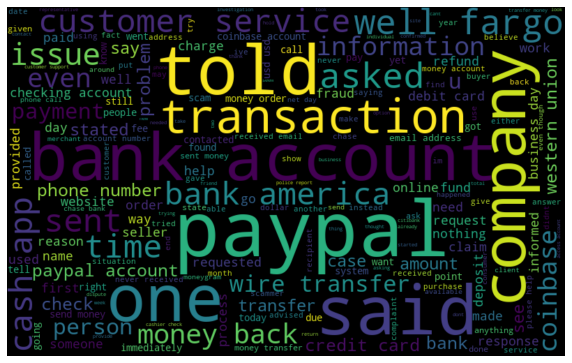

Student loan


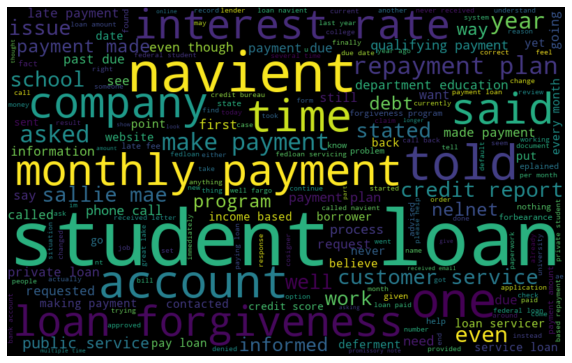

Checking or savings account


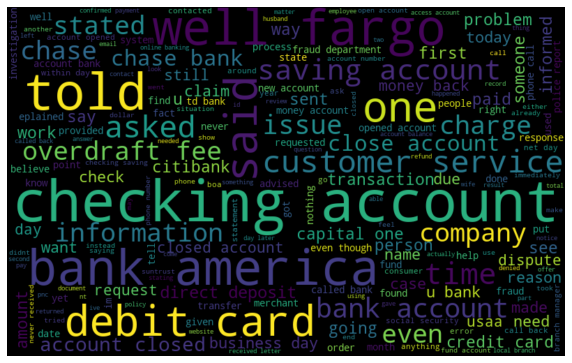

In [31]:
from wordcloud import WordCloud
for product_name in df['Product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df.loc[df['Product'].str.contains(product_name),'Consumer_complaint_narrative']])
    
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [33]:
X_train,X_test,y_train,y_test=train_test_split(df['Consumer_complaint_narrative'],df['Product'],test_size=0.3,random_state=68)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
text=Pipeline([('tfidf',TfidfVectorizer()),('classifier',MultinomialNB())])

In [36]:
text.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [37]:
predictions=text.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test,predictions))

[[4998  359   54   26  416   83   31    9   27]
 [ 574 4642  263   92  148   55   71   54  111]
 [  64  371 4435  450   21  131   47  139  297]
 [ 103  213  618 4314   29  130  210  153  152]
 [ 891  216    9   22 4673   70   98   30   17]
 [  85   43   50   44   11 5714   41   52   37]
 [ 238  229  119  237  119  219 4100  220  446]
 [  28   37  120  131   16   75  131 5417   80]
 [  94  126  221  126   17  108  361   88 4904]]


In [40]:
print(classification_report(y_test,predictions))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.71      0.83      0.76      6003
                                                 Credit card or prepaid card       0.74      0.77      0.76      6010
Credit reporting, credit repair services, or other personal consumer reports       0.75      0.74      0.75      5955
                                                             Debt collection       0.79      0.73      0.76      5922
                          Money transfer, virtual currency, or money service       0.86      0.78      0.81      6026
                                                                    Mortgage       0.87      0.94      0.90      6077
                                   Payday loan, title loan, or personal loan       0.81      0.69      0.74      5927
                                                       

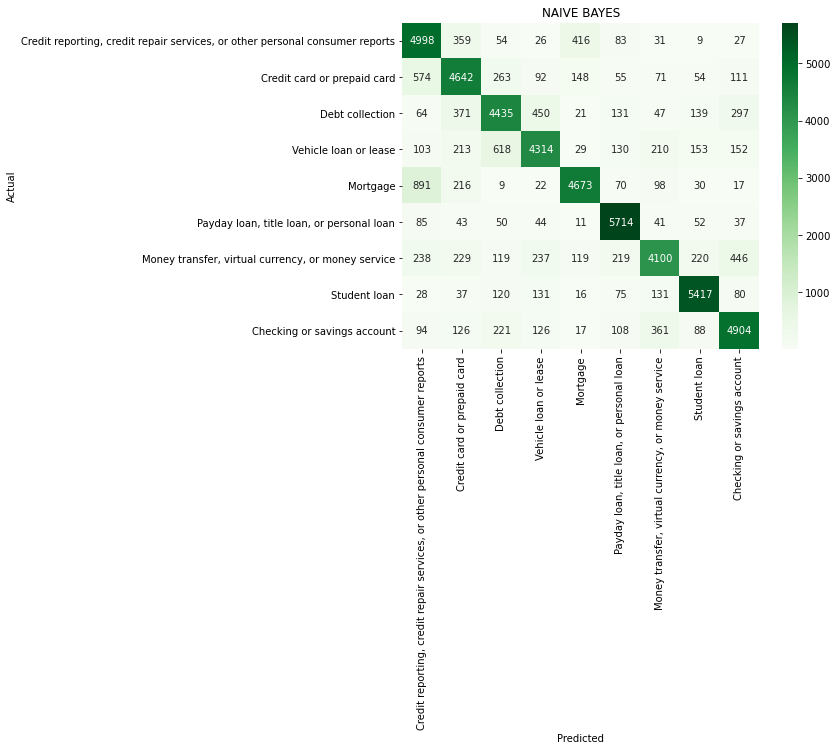

In [41]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('NAIVE BAYES')
plt.show()

In [31]:
from sklearn import metrics

In [43]:
metrics.accuracy_score(y_test,predictions)

0.7999444444444445

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
text_dectree=Pipeline([('tfidf',TfidfVectorizer()),('classifier',DecisionTreeClassifier())])

In [46]:
text_dectree.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [47]:
predictions_dectree=text_dectree.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions_dectree))

[[3807  561  123  125  940  117  174   43  113]
 [ 542 3917  365  325  294   84  240   72  171]
 [ 105  334 4031  622   51  140  167  156  349]
 [ 150  320  666 3869  105  142  302  166  202]
 [ 852  272   82   88 4419   76  133   44   60]
 [ 107   79  171  165   77 4953  272  114  139]
 [ 195  169  181  270  130  189 4186  181  426]
 [  40   82  168  174   60  105  357 4913  136]
 [  85  193  348  218   76  101  483  113 4428]]


In [49]:
print(classification_report(y_test,predictions_dectree))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.65      0.63      0.64      6003
                                                 Credit card or prepaid card       0.66      0.65      0.66      6010
Credit reporting, credit repair services, or other personal consumer reports       0.66      0.68      0.67      5955
                                                             Debt collection       0.66      0.65      0.66      5922
                          Money transfer, virtual currency, or money service       0.72      0.73      0.73      6026
                                                                    Mortgage       0.84      0.82      0.83      6077
                                   Payday loan, title loan, or personal loan       0.66      0.71      0.68      5927
                                                       

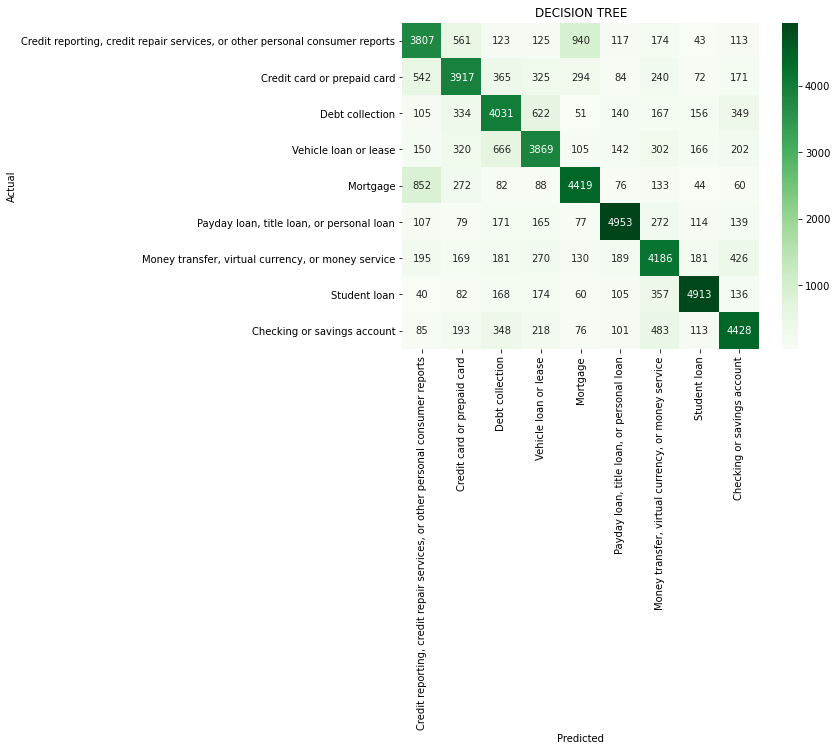

In [50]:
confu_mat = confusion_matrix(y_test, predictions_dectree)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('DECISION TREE')
plt.show()

In [51]:
metrics.accuracy_score(y_test,predictions_dectree)

0.7133888888888889

In [52]:
from sklearn.svm import LinearSVC

In [53]:
text_svm=Pipeline([('tfidf',TfidfVectorizer()),('classifier',LinearSVC())])

In [54]:
text_svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [55]:
predictions_svm=text_svm.predict(X_test)

In [56]:
print(confusion_matrix(y_test,predictions_svm))

[[4868  344   51   50  524   60   64   11   31]
 [ 353 4898  215  157  153   39   84   22   89]
 [  54  294 4580  459   21  111   77  114  245]
 [  82  184  456 4675   39  107  163   99  117]
 [ 598  174   27   36 5000   48   97   25   21]
 [  46   31   69   57   14 5683   84   32   61]
 [ 117  144   99  207   98   86 4776   76  324]
 [  19   46   95  112   20   39  163 5486   55]
 [  47  122  156  141   15   38  358   37 5131]]


In [57]:
print(classification_report(y_test,predictions_svm))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.79      0.81      0.80      6003
                                                 Credit card or prepaid card       0.79      0.81      0.80      6010
Credit reporting, credit repair services, or other personal consumer reports       0.80      0.77      0.78      5955
                                                             Debt collection       0.79      0.79      0.79      5922
                          Money transfer, virtual currency, or money service       0.85      0.83      0.84      6026
                                                                    Mortgage       0.91      0.94      0.92      6077
                                   Payday loan, title loan, or personal loan       0.81      0.81      0.81      5927
                                                       

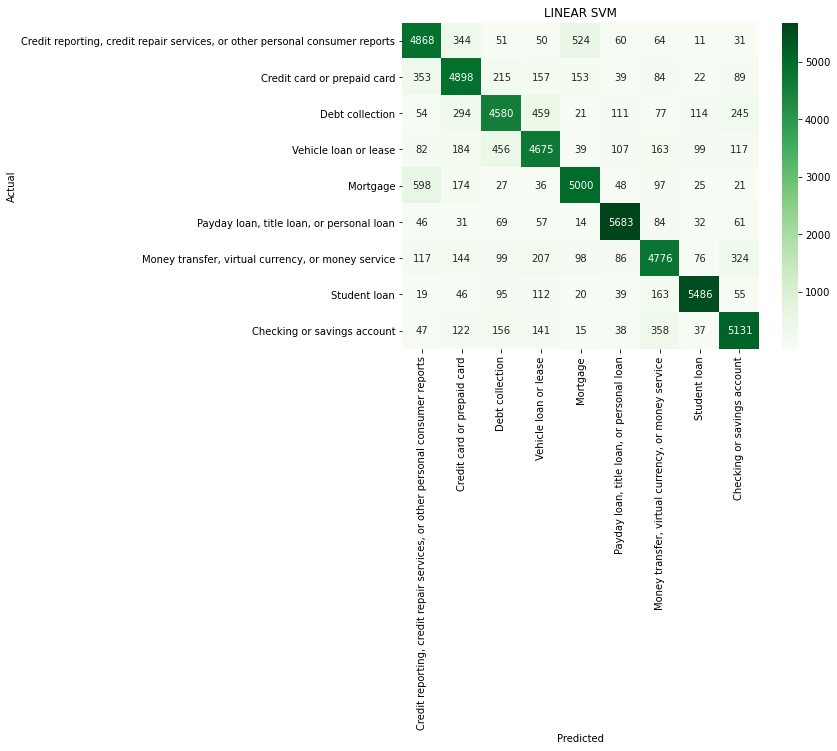

In [58]:
confu_mat = confusion_matrix(y_test, predictions_svm)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LINEAR SVM')
plt.show()

In [59]:
metrics.accuracy_score(y_test,predictions_svm)

0.8351296296296297

In [30]:
from sklearn.linear_model import LogisticRegression

In [37]:
text_logi=Pipeline([('tfidf',TfidfVectorizer()),('classifier',LogisticRegression(max_iter=10000,multi_class='ovr'))])

In [38]:
text_logi.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=10000, multi_class='ovr'))])

In [39]:
predictions_logi=text_logi.predict(X_test)

In [40]:
print(confusion_matrix(y_test,predictions_logi))

[[4906  347   44   41  544   40   53    7   21]
 [ 371 4879  208  146  164   16   92   20  114]
 [  56  271 4584  505   15  127   83  122  192]
 [  60  179  423 4734   33  111  178  100  104]
 [ 613  163   22   44 4992   47   98   23   24]
 [  41   35   64   41   29 5650  127   31   59]
 [ 153  156  120  270   98   78 4658   51  343]
 [  22   25  100  144   16   32  214 5407   75]
 [  43   97  209  129   19   38  451   29 5030]]


In [41]:
print(classification_report(y_test,predictions_logi))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.78      0.82      0.80      6003
                                                 Credit card or prepaid card       0.79      0.81      0.80      6010
Credit reporting, credit repair services, or other personal consumer reports       0.79      0.77      0.78      5955
                                                             Debt collection       0.78      0.80      0.79      5922
                          Money transfer, virtual currency, or money service       0.84      0.83      0.84      6026
                                                                    Mortgage       0.92      0.93      0.93      6077
                                   Payday loan, title loan, or personal loan       0.78      0.79      0.78      5927
                                                       

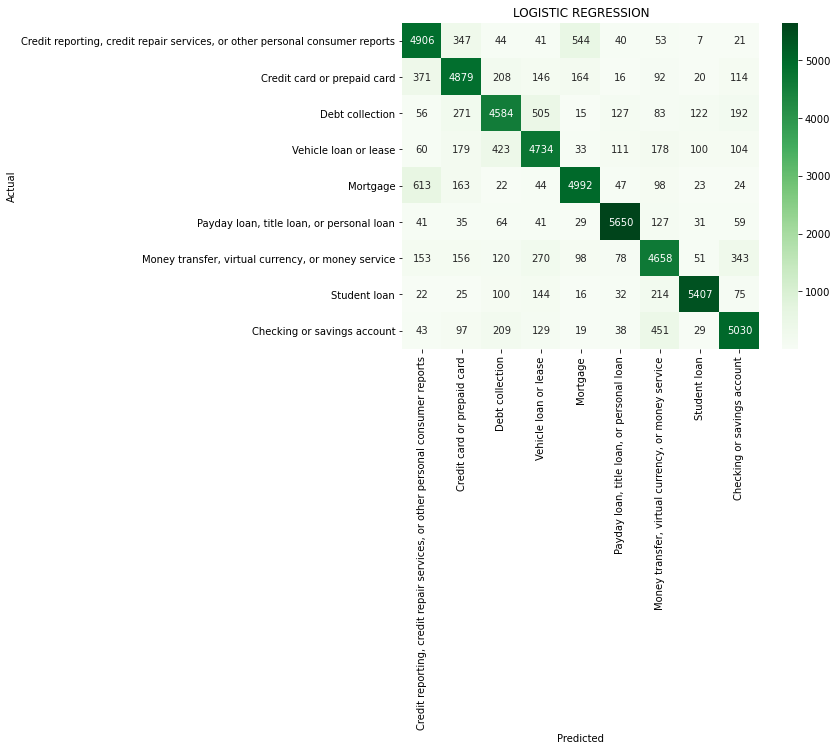

In [43]:
import seaborn as sns
confu_mat = confusion_matrix(y_test, predictions_logi)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [44]:
metrics.accuracy_score(y_test,predictions_logi)

0.8303703703703704

In [68]:
#K NEAREST NEIGHBOURS
from sklearn.neighbors import KNeighborsClassifier

In [69]:
error_rate=[]
for i in range(1,36,2):
    text_knn=Pipeline([('tfidf',TfidfVectorizer()),('classifier',KNeighborsClassifier(n_neighbors=i))])
    text_knn.fit(X_train,y_train)
    pred_knn=text_knn.predict(X_test)
    error_rate.append(np.mean(pred_knn!=y_test))
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35


Text(0, 0.5, 'Error rate')

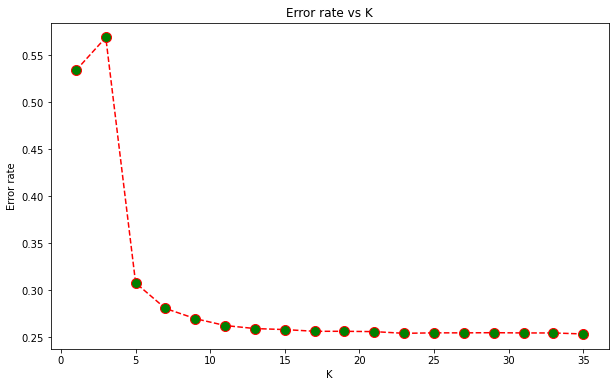

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,36,2),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [76]:
text_knn=Pipeline([('tfidf',TfidfVectorizer()),('classifier',KNeighborsClassifier(n_neighbors=11))])

In [77]:
text_knn.fit(X_train,y_train)
pred_knn=text_knn.predict(X_test)

In [78]:
metrics.accuracy_score(y_test,pred_knn)

0.7376481481481482

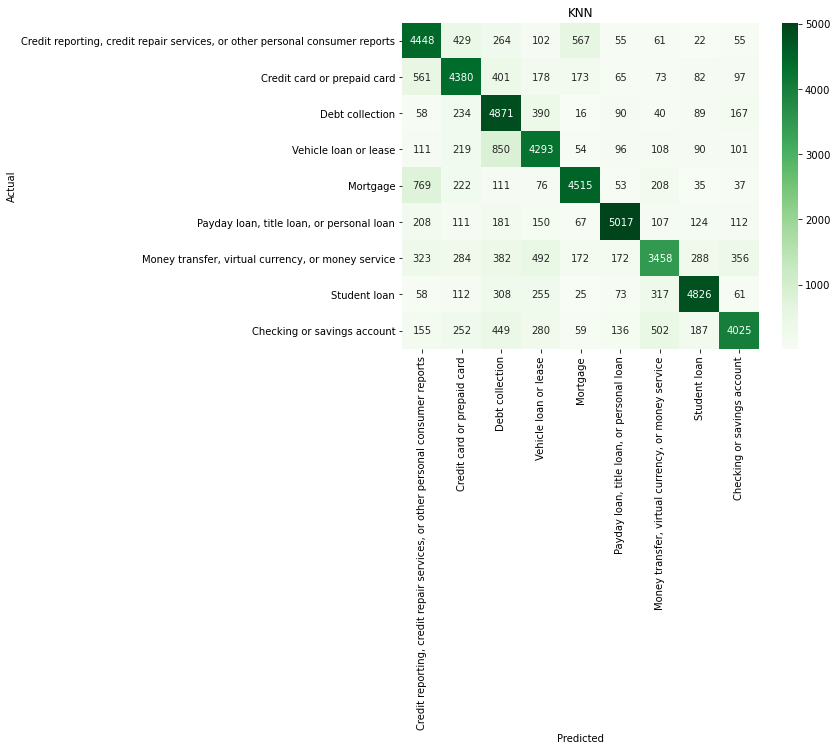

In [79]:
confu_mat = confusion_matrix(y_test, pred_knn)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confu_mat, annot=True, fmt="d", cmap="Greens",xticklabels=df['Product'].unique(),yticklabels=df['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN')
plt.show()

In [80]:
print(classification_report(y_test,pred_knn))

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.66      0.74      0.70      6003
                                                 Credit card or prepaid card       0.70      0.73      0.71      6010
Credit reporting, credit repair services, or other personal consumer reports       0.62      0.82      0.71      5955
                                                             Debt collection       0.69      0.72      0.71      5922
                          Money transfer, virtual currency, or money service       0.80      0.75      0.77      6026
                                                                    Mortgage       0.87      0.83      0.85      6077
                                   Payday loan, title loan, or personal loan       0.71      0.58      0.64      5927
                                                       